<h1>Credit Score Analysis<h1>

<h1>1. Importing the Packages<h1>

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [190]:

import numpy as np
import seaborn as sns
from datetime import datetime
from IPython.display import Image  
import pydotplus
%pylab inline

import sklearn as sk
import sklearn.tree as tree

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>2. Importing the Dataset<h1>

In [6]:
df = pd.read_csv(r"A:\Downloads\train.csv",encoding='utf-8')

<h1>3. Understanding the Data<h1>

In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.shape

(100000, 28)

In [9]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
ID                          100000 non-null object
Customer_ID                 100000 non-null object
Month                       100000 non-null object
Name                        90015 non-null object
Age                         100000 non-null object
SSN                         100000 non-null object
Occupation                  100000 non-null object
Annual_Income               100000 non-null object
Monthly_Inhand_Salary       84998 non-null float64
Num_Bank_Accounts           100000 non-null int64
Num_Credit_Card             100000 non-null int64
Interest_Rate               100000 non-null int64
Num_of_Loan                 100000 non-null object
Type_of_Loan                88592 non-null object
Delay_from_due_date         100000 non-null int64
Num_of_Delayed_Payment      92998 non-null object
Changed_Credit_Limit        100000 non-null object
Num_Credit_Inquiries        98

<h1>4. Data Cleaning<h1>

Checking Null Values

In [11]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
df.isna().any().sum()

8

Removing Underscore from all the columns that have underscores with the values

In [13]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.str.strip('_')
df['Monthly_Balance'] = df.Monthly_Balance.str.strip('_')
df['Amount_invested_monthly'] = df.Amount_invested_monthly.str.strip('_')
df['Annual_Income'] = df.Annual_Income.str.strip('_')
df['Num_of_Loan'] = df.Num_of_Loan.str.strip('_')
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.str.strip('_')
df['Outstanding_Debt'] = df.Outstanding_Debt.str.strip('_')
df['Age'] = df.Age.str.strip('_')

In [14]:
#Changing the current numerical fields from string to their true data type
df.Monthly_Balance = df.Monthly_Balance.astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.astype(float)
df.Age = df.Age.astype(int)

Updating the SSN column

In [15]:
df.SSN.unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [16]:
len(df[df.SSN == '#F%$D@*&8'])

5572

In [17]:
#creating a temporary table for the groupby result
lookup = df.groupby(['Customer_ID','SSN'],as_index = False).agg({'Monthly_Inhand_Salary':'max',\
                         'Num_Credit_Inquiries':'max', 'Monthly_Balance':'mean', 'Amount_invested_monthly':'mean'})\
                        .rename(columns = {'Monthly_Inhand_Salary':'MIS_Max', \
                         'Num_Credit_Inquiries':'NCI_Max','Monthly_Balance':'MB_Mean', 'Amount_invested_monthly':'AIM_Mean'})

In [18]:
df[5:10][['Customer_ID','SSN']]

,Customer_ID,SSN
5,CUS_0xd40,821-00-0265
6,CUS_0xd40,821-00-0265
7,CUS_0xd40,#F%$D@*&8
8,CUS_0x21b1,004-07-5839
9,CUS_0x21b1,004-07-5839


In [19]:
lookup = lookup[lookup.SSN != '#F%$D@*&8']

In [20]:
#Merging the dataframes
df_ssn = df.merge(lookup, left_on = 'Customer_ID', right_on = 'Customer_ID', how = 'left')

In [21]:
df_ssn[5:10][['Customer_ID','SSN_x','SSN_y']]

,Customer_ID,SSN_x,SSN_y
5,CUS_0xd40,821-00-0265,821-00-0265
6,CUS_0xd40,821-00-0265,821-00-0265
7,CUS_0xd40,#F%$D@*&8,821-00-0265
8,CUS_0x21b1,004-07-5839,004-07-5839
9,CUS_0x21b1,004-07-5839,004-07-5839


In [22]:
df_ssn[df_ssn['SSN_y' ]== '#F%$D@*&8']

,ID,Customer_ID,Month,Name,Age,SSN_x,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,SSN_y,MIS_Max,NCI_Max,MB_Mean,AIM_Mean


In [23]:
df_ssn = df_ssn.drop(columns = ['SSN_x'],axis = 1)

In [24]:
len(df_ssn)

100000

In [25]:
df_ssn.Monthly_Inhand_Salary.replace(to_replace=NaN, value=0, inplace=True)
df_ssn.Num_Credit_Inquiries.replace(to_replace=NaN, value=0, inplace=True)
df_ssn.Monthly_Balance.fillna(0,inplace=True)
df_ssn.MB_Mean.fillna(0,inplace=True)

Updating the Monthly Inhand Salary

In [26]:
df_ssn['Monthly_Inhand_Salary'] = df_ssn.apply(lambda x: x.Monthly_Inhand_Salary \
                                                        if x.Monthly_Inhand_Salary > 0 else x.MIS_Max , axis = 1)

In [27]:
df_ssn = df_ssn.drop(columns = ['MIS_Max'],axis = 1)

In [28]:
df_ssn['Num_Credit_Inquiries'] = df_ssn.apply(lambda x: x.Num_Credit_Inquiries \
                                                        if x.Num_Credit_Inquiries > 0 else x.NCI_Max , axis = 1)
df_ssn = df_ssn.drop(columns = ['NCI_Max'],axis = 1)


In [29]:
df_ssn.Num_of_Delayed_Payment.fillna(0,inplace=True)

Updating the Monthly balance column

In [30]:
df_ssn['Monthly_Balance'] = df_ssn.apply(lambda x: x.Monthly_Balance \
                                                        if x.Monthly_Balance > 0 else x.MB_Mean , axis = 1)

In [31]:
df_ssn = df_ssn.drop(columns = ['MB_Mean'],axis = 1)

Updating the Amount_invested_monthly column

In [32]:
df_ssn['Amount_invested_monthly'] = df_ssn.apply(lambda x: x.Amount_invested_monthly \
                                                        if x.Amount_invested_monthly > 0 else x.AIM_Mean , axis = 1)
df_ssn = df_ssn.drop(columns = ['AIM_Mean'],axis = 1)

In [33]:
df_ssn.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
SSN_y                           0
dtype: int64

In [34]:
df_ssn[df_ssn.Name == 'Langep'][['Customer_ID','Name']].drop_duplicates()

,Customer_ID,Name
16,CUS_0x2dbc,Langep
11872,CUS_0xaf95,Langep
44856,CUS_0x109d,Langep
53272,CUS_0x4854,Langep
61376,CUS_0xba1c,Langep
76872,CUS_0x7a96,Langep


In [35]:
df_ssn = df_ssn.drop(columns = ['Name'],axis = 1)
df_clean = df_ssn.copy()

In [36]:
len(df_clean)

100000

There are a few data entry mistakes in the age sections.

In [37]:
df_clean.Age.min()
df_clean.Age.max()

-500

8698

In [38]:
df_clean[df_clean.Customer_ID == 'CUS_0xd40'][['Customer_ID','SSN_y','Age']]

,Customer_ID,SSN_y,Age
0,CUS_0xd40,821-00-0265,23
1,CUS_0xd40,821-00-0265,23
2,CUS_0xd40,821-00-0265,-500
3,CUS_0xd40,821-00-0265,23
4,CUS_0xd40,821-00-0265,23
5,CUS_0xd40,821-00-0265,23
6,CUS_0xd40,821-00-0265,23
7,CUS_0xd40,821-00-0265,23


In [39]:
df_age = df_clean[((df_clean.Age).astype(int)>-1) & ((df_clean.Age).astype(int)<100)]

In [40]:
df_age = df_age[['SSN_y','Age']]
df_age.Age.min()
df_age.Age.max()

14

99

In [41]:
df_age = df_age.drop_duplicates()
df_age = df_age.drop_duplicates(subset = ['SSN_y'])

Updating the age column with crct age

In [42]:
df_clean = df_clean.merge(df_age, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [43]:
df_clean['Age_x'] = df_clean.apply(lambda x: x.Age_y \
                                                        if ((x.Age_x > 100) | (x.Age_x <0)) else x.Age_x , axis = 1)

In [44]:
df_clean[df_clean.Customer_ID == 'CUS_0xd40'][['Customer_ID','SSN_y','Age_x','Age_y']]

,Customer_ID,SSN_y,Age_x,Age_y
0,CUS_0xd40,821-00-0265,23,23
1,CUS_0xd40,821-00-0265,23,23
2,CUS_0xd40,821-00-0265,23,23
3,CUS_0xd40,821-00-0265,23,23
4,CUS_0xd40,821-00-0265,23,23
5,CUS_0xd40,821-00-0265,23,23
6,CUS_0xd40,821-00-0265,23,23
7,CUS_0xd40,821-00-0265,23,23


In [45]:
df_clean = df_clean.drop(columns = ['Age_y'],axis = 1)
df_clean.rename(columns = {'Age_x':'Age'}, inplace = True)

In [46]:
del(df_age)

Cleaning Payment Behavior column

In [47]:
df_clean['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [48]:
df_pb = df_clean[df_clean['Payment_Behaviour'] != '!@9#%8'][['SSN_y','Payment_Behaviour']]

In [49]:
df_pb = df_pb.drop_duplicates()
df_pb = df_pb.drop_duplicates(subset = ['SSN_y'])

In [50]:
df_pb.head(2)

,SSN_y,Payment_Behaviour
0,821-00-0265,High_spent_Small_value_payments
8,004-07-5839,Low_spent_Small_value_payments


In [51]:
df_clean= df_clean.merge(df_pb, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [52]:
df_clean.rename(columns = {'Payment_Behaviour_y':'Payment_Behaviour'}, inplace = True)
df_clean = df_clean.drop(columns = ['Payment_Behaviour_x'],axis = 1)

There are some blank spaces in Occupation Columns

In [53]:
df_clean.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [54]:
df_occu = df_clean[df_clean.Occupation!= '_______'][['SSN_y','Occupation']]
df_occu.Occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [55]:
df_occu = df_occu.drop_duplicates()
df_occu = df_occu.drop_duplicates(subset = ['SSN_y'])

Updating the occupation with correct occupation for each unique ssn

In [56]:
df_clean = df_clean.merge(df_occu, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')
#dropping and renaming extra columns
df_clean = df_clean.drop(columns = ['Occupation_x'],axis = 1)
df_clean.rename(columns = {'Occupation_y':'Occupation'}, inplace = True)
#deleting temp dataframe
del(df_occu) 

Now we have some underscore in credit mix column

In [57]:
df_clean.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [58]:
df_cm = df_clean[df_clean.Credit_Mix!= '_'][['SSN_y','Credit_Mix']]
df_cm.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [59]:
df_cm = df_cm.drop_duplicates()
df_cm = df_cm.drop_duplicates(subset = ['SSN_y'])

In [60]:
df_clean = df_clean.merge(df_cm, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [61]:
df_clean = df_clean.drop(columns = ['Credit_Mix_x'],axis = 1)
df_clean.rename(columns = {'Credit_Mix_y':'Credit_Mix'}, inplace = True)
del(df_cm) #deleting temporary columns

In [62]:
len(df_clean[df_clean.Changed_Credit_Limit == ''])

2091

In [63]:
df_ccl = df_clean[df_clean.Changed_Credit_Limit!= ''][['SSN_y','Changed_Credit_Limit']]
df_ccl = df_ccl.drop_duplicates()
df_ccl = df_ccl.drop_duplicates(subset = ['SSN_y'])

Updating the correct Changed_Credit_Limit values using SSN

In [64]:
df_clean = df_clean.merge(df_ccl, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')
#Dropping and Renaming columns
df_clean = df_clean.drop(columns = ['Changed_Credit_Limit_x'],axis = 1)
df_clean.rename(columns = {'Changed_Credit_Limit_y':'Changed_Credit_Limit'}, inplace = True)

In [65]:
len(df_clean[df_clean.Changed_Credit_Limit == ''])

0

In [66]:
del(df_ccl) 

In [67]:
df_clean['Credit_History_Age'] = df_clean.Credit_History_Age.str.rstrip(' Months')

In [68]:
df_CHA = df_clean.Credit_History_Age.str.split(" Years and ",expand=True).rename(columns={0: 'Credit_history_years', 1: 'Credit_history_months'})

In [69]:
df_CHA['Credit_history_total_months'] = (df_CHA.Credit_history_months).astype(float) + ((df_CHA.Credit_history_years).astype(float))*12

In [70]:
df_clean['Credit_History_Age'] = df_CHA.Credit_history_total_months
df_CHA  = df_CHA.Credit_history_total_months

Now for credit history age in order to replace nan by correct values we have to add 1 to a person's previous month credit history age. To do that we are shifting that column once

In [71]:
df_CHA = df_CHA.shift(1)
df_clean['CHA_Up'] = df_CHA

In [72]:
df_clean.Credit_History_Age.fillna(0,inplace=True)

In [73]:
df_clean.Credit_History_Age = df_clean.Credit_History_Age.astype(float)

In [74]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 1 , axis = 1)

Replacing the correct credit history age using SSN

In [75]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [76]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 2 , axis = 1)
df_clean.Credit_History_Age.isna().sum()

72

Now our nans are reduced to 72

In [77]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [78]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 3 , axis = 1)
df_clean.Credit_History_Age.isna().sum()

6

In [79]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [80]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 4 , axis = 1)
df_clean.Credit_History_Age.isna().sum()

1

In [81]:
df_clean.CHA_Up = df_clean.CHA_Up.shift(1)

In [82]:
df_clean['Credit_History_Age'] = df_clean.apply(lambda x: x.Credit_History_Age \
                                                        if x.Credit_History_Age > 0 else x.CHA_Up + 5 , axis = 1)
df_clean.Credit_History_Age.isna().sum()

0

Now the total Nan's are 0

In [83]:
#dropping the columns
df_clean = df_clean.drop(columns = ['CHA_Up'],axis = 1)

In [84]:
del(df_CHA) #deleting temp table

We have some high interest rates which can be Data Entry Errors. So we are cleaning those errors.

In [85]:
df_clean[df_clean.Customer_ID == 'CUS_0x3fd9'].head()[['Customer_ID','Interest_Rate']]

,Customer_ID,Interest_Rate
71640,CUS_0x3fd9,17
71641,CUS_0x3fd9,5797
71642,CUS_0x3fd9,17
71643,CUS_0x3fd9,17
71644,CUS_0x3fd9,3037


In [86]:
df_clean.Interest_Rate.min()

df_clean.Interest_Rate.max()

1

5797

In [87]:
df_IR = df_clean[((df_clean.Interest_Rate).astype(int)<51)][['SSN_y','Interest_Rate']]

In [88]:
df_IR = df_IR.drop_duplicates()
df_IR = df_IR.drop_duplicates(subset = ['SSN_y'])

In [89]:
df_clean = df_clean.merge(df_IR, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [90]:
df_clean[df_clean.Customer_ID == 'CUS_0x3fd9'].head()[['Customer_ID','Interest_Rate_x','Interest_Rate_y']]

,Customer_ID,Interest_Rate_x,Interest_Rate_y
71640,CUS_0x3fd9,17,17
71641,CUS_0x3fd9,5797,17
71642,CUS_0x3fd9,17,17
71643,CUS_0x3fd9,17,17
71644,CUS_0x3fd9,3037,17


In [91]:
df_clean = df_clean.drop(columns = ['Interest_Rate_x'],axis = 1)
df_clean.rename(columns = {'Interest_Rate_y':'Interest_Rate'}, inplace = True)

In [92]:
del(df_IR)

Additionally, there are some data entry mistakes in the "Number of Bank Accounts" column. 

In [93]:
df_clean.Num_Bank_Accounts.max()

1798

In [94]:
df_clean[df_clean.Num_Bank_Accounts == df_clean.Num_Bank_Accounts.min()].head()[['Customer_ID','SSN_y','Num_Bank_Accounts']]

,Customer_ID,SSN_y,Num_Bank_Accounts
30330,CUS_0x4f2a,807-03-5415,-1
30331,CUS_0x4f2a,807-03-5415,-1
30332,CUS_0x4f2a,807-03-5415,-1
30333,CUS_0x4f2a,807-03-5415,-1
30334,CUS_0x4f2a,807-03-5415,-1


In [95]:
df_clean['Num_Bank_Accounts'] = df_clean.apply(lambda x: 0 if x.Num_Bank_Accounts < 0 else x.Num_Bank_Accounts , axis = 1)

In [96]:
df_clean['Num_Bank_Accounts'].min()

0

In [97]:
df_clean[df_clean.Customer_ID == 'CUS_0x11c1'].head()[['Customer_ID','SSN_y','Num_Bank_Accounts']]

,Customer_ID,SSN_y,Num_Bank_Accounts
64536,CUS_0x11c1,688-99-5258,6
64537,CUS_0x11c1,688-99-5258,1798
64538,CUS_0x11c1,688-99-5258,6
64539,CUS_0x11c1,688-99-5258,6
64540,CUS_0x11c1,688-99-5258,6


In [98]:
df_NBA = df_clean[df_clean.Num_Bank_Accounts < 15][['SSN_y','Num_Bank_Accounts']]

In [99]:
df_NBA = df_NBA.drop_duplicates()
df_NBA = df_NBA.drop_duplicates(subset = ['SSN_y'])

In [100]:
df_clean = df_clean.merge(df_NBA, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [101]:
df_clean[df_clean.Customer_ID == 'CUS_0x11c1'].head()[['Customer_ID','SSN_y','Num_Bank_Accounts_x','Num_Bank_Accounts_y']]

,Customer_ID,SSN_y,Num_Bank_Accounts_x,Num_Bank_Accounts_y
64536,CUS_0x11c1,688-99-5258,6,6
64537,CUS_0x11c1,688-99-5258,1798,6
64538,CUS_0x11c1,688-99-5258,6,6
64539,CUS_0x11c1,688-99-5258,6,6
64540,CUS_0x11c1,688-99-5258,6,6


In [102]:
df_clean = df_clean.drop(columns = ['Num_Bank_Accounts_x'],axis = 1)
df_clean.rename(columns = {'Num_Bank_Accounts_y':'Num_Bank_Accounts'}, inplace = True)

In [103]:
del(df_NBA)

We discovered that the Credit card column also contains data entry mistakes, so we are correcting those.


In [104]:
df_clean.Num_Credit_Card.max()

df_clean.Num_Credit_Card.min()

1499

0

In [105]:
df_clean[df_clean.Customer_ID == 'CUS_0x1fdc'].tail()[['Customer_ID','SSN_y','Num_Credit_Card']]

,Customer_ID,SSN_y,Num_Credit_Card
25011,CUS_0x1fdc,896-78-0268,3
25012,CUS_0x1fdc,896-78-0268,3
25013,CUS_0x1fdc,896-78-0268,3
25014,CUS_0x1fdc,896-78-0268,3
25015,CUS_0x1fdc,896-78-0268,1499


In [106]:
df_NCC = df_clean[df_clean.Num_Credit_Card <= 15][['SSN_y','Num_Credit_Card']]

In [107]:
df_NCC = df_NCC.drop_duplicates()
df_NCC = df_NCC.drop_duplicates(subset = ['SSN_y'])

In [108]:
df_clean = df_clean.merge(df_NCC, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [109]:
df_clean[df_clean.Customer_ID == 'CUS_0x1fdc'].tail()[['Customer_ID','SSN_y','Num_Credit_Card_x','Num_Credit_Card_y']]

,Customer_ID,SSN_y,Num_Credit_Card_x,Num_Credit_Card_y
25011,CUS_0x1fdc,896-78-0268,3,3
25012,CUS_0x1fdc,896-78-0268,3,3
25013,CUS_0x1fdc,896-78-0268,3,3
25014,CUS_0x1fdc,896-78-0268,3,3
25015,CUS_0x1fdc,896-78-0268,1499,3


In [110]:
df_clean = df_clean.drop(columns = ['Num_Credit_Card_x'],axis = 1)

df_clean.rename(columns = {'Num_Credit_Card_y':'Num_Credit_Card'}, inplace = True)

In [111]:
del(df_NCC)

Cleaning Monthly Balance

In [112]:
df_clean[df_clean.Customer_ID == 'CUS_0x9885'].head()[['Customer_ID','Monthly_Balance']]

,Customer_ID,Monthly_Balance
5544,CUS_0x9885,4.233968e+02
5545,CUS_0x9885,-4.761905e+25
5546,CUS_0x9885,2.784116e+02
5547,CUS_0x9885,4.205569e+02
5548,CUS_0x9885,7.128786e+01


In [113]:
df_clean[df_clean.Customer_ID == 'CUS_0x9885'].head()[['Customer_ID','SSN_y','Monthly_Balance']]

,Customer_ID,SSN_y,Monthly_Balance
5544,CUS_0x9885,186-49-9679,4.233968e+02
5545,CUS_0x9885,186-49-9679,-4.761905e+25
5546,CUS_0x9885,186-49-9679,2.784116e+02
5547,CUS_0x9885,186-49-9679,4.205569e+02
5548,CUS_0x9885,186-49-9679,7.128786e+01


In [114]:
df_clean['Monthly_Balance'] = df_clean.apply(lambda x: 0 if x.Monthly_Balance < 0 else x.Monthly_Balance , axis = 1)

In [115]:
df_clean[df_clean.Customer_ID == 'CUS_0x9885'].head()[['Customer_ID','SSN_y','Monthly_Balance']]

,Customer_ID,SSN_y,Monthly_Balance
5544,CUS_0x9885,186-49-9679,423.396814
5545,CUS_0x9885,186-49-9679,0.000000
5546,CUS_0x9885,186-49-9679,278.411561
5547,CUS_0x9885,186-49-9679,420.556910
5548,CUS_0x9885,186-49-9679,71.287860


We also have a few data entry mistakes in the overall EMI column. Thus, we are fixing those mistakes.


In [116]:
df_clean['Total_EMI_per_month'].max()

82331.0

In [117]:
df_clean[df_clean.Customer_ID == 'CUS_0x2a3a'][['Customer_ID','SSN_y','Total_EMI_per_month']]

,Customer_ID,SSN_y,Total_EMI_per_month
87008,CUS_0x2a3a,497-15-6884,76.806655
87009,CUS_0x2a3a,497-15-6884,76.806655
87010,CUS_0x2a3a,497-15-6884,76.806655
87011,CUS_0x2a3a,497-15-6884,68.953758
87012,CUS_0x2a3a,497-15-6884,68.953758
87013,CUS_0x2a3a,497-15-6884,82331.000000
87014,CUS_0x2a3a,497-15-6884,68.953758
87015,CUS_0x2a3a,497-15-6884,68.953758


In [118]:
df_EMI = df_clean[df_clean.Total_EMI_per_month < 1800][['SSN_y','Total_EMI_per_month']]

In [119]:
df_EMI = df_EMI.drop_duplicates()
df_EMI = df_EMI.drop_duplicates(subset = ['SSN_y'])

In [120]:
df_clean = df_clean.merge(df_EMI, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [121]:
df_clean['Total_EMI_per_month_y'] = df_clean.apply(lambda x: x.Total_EMI_per_month_x if x.Total_EMI_per_month_x < 1800 else \
                                                   x.Total_EMI_per_month_y , axis = 1)

In [122]:
df_clean[df_clean.Customer_ID == 'CUS_0x2a3a'].tail()[['Customer_ID','SSN_y','Total_EMI_per_month_x','Total_EMI_per_month_y']]

,Customer_ID,SSN_y,Total_EMI_per_month_x,Total_EMI_per_month_y
87011,CUS_0x2a3a,497-15-6884,68.953758,68.953758
87012,CUS_0x2a3a,497-15-6884,68.953758,68.953758
87013,CUS_0x2a3a,497-15-6884,82331.000000,76.806655
87014,CUS_0x2a3a,497-15-6884,68.953758,68.953758
87015,CUS_0x2a3a,497-15-6884,68.953758,68.953758


In [123]:
df_clean = df_clean.drop(columns = ['Total_EMI_per_month_y'],axis = 1)

df_clean.rename(columns = {'Total_EMI_per_month_x':'Total_EMI_per_month'}, inplace = True)

In [124]:
del(df_EMI)

In [125]:
df_clean.Num_of_Delayed_Payment = df_clean.Num_of_Delayed_Payment.astype(float)

In [126]:
df_clean.Num_of_Delayed_Payment.max()

4397.0

In [127]:
df_clean[df_clean.Customer_ID == 'CUS_0x8f59'].tail()[['Customer_ID','SSN_y','Num_of_Delayed_Payment']]

,Customer_ID,SSN_y,Num_of_Delayed_Payment
51563,CUS_0x8f59,705-77-2792,12.0
51564,CUS_0x8f59,705-77-2792,12.0
51565,CUS_0x8f59,705-77-2792,4397.0
51566,CUS_0x8f59,705-77-2792,0.0
51567,CUS_0x8f59,705-77-2792,12.0


In [128]:
df_NDP = df_clean[(df_clean.Num_of_Delayed_Payment >0)&(df_clean.Num_of_Delayed_Payment < 50)][['SSN_y','Num_of_Delayed_Payment']]

In [129]:
df_NDP = df_NDP.drop_duplicates()
df_NDP = df_NDP.drop_duplicates(subset = ['SSN_y'])

In [130]:
df_clean = df_clean.merge(df_NDP, left_on = 'SSN_y', right_on = 'SSN_y', how = 'left')

In [131]:
df_clean[df_clean.Customer_ID == 'CUS_0x8f59'].tail()[['Customer_ID','SSN_y','Num_of_Delayed_Payment_x','Num_of_Delayed_Payment_y']]

,Customer_ID,SSN_y,Num_of_Delayed_Payment_x,Num_of_Delayed_Payment_y
51563,CUS_0x8f59,705-77-2792,12.0,12.0
51564,CUS_0x8f59,705-77-2792,12.0,12.0
51565,CUS_0x8f59,705-77-2792,4397.0,12.0
51566,CUS_0x8f59,705-77-2792,0.0,12.0
51567,CUS_0x8f59,705-77-2792,12.0,12.0


In [132]:
df_clean = df_clean.drop(columns = ['Num_of_Delayed_Payment_x'],axis = 1)

df_clean.rename(columns = {'Num_of_Delayed_Payment_y':'Num_of_Delayed_Payment'}, inplace = True)

In [133]:
del(df_NDP)

We currently have a list of each person's loan types, which we are splitting into the amount of loan types each person has.


In [134]:
df_clean.isna().sum().sum()

11864

In [135]:
df_loan = df.Type_of_Loan.str.split(', ', expand = True).rename(columns={0: 'l1', 1: 'l2',2:'l3',3:'l4',4:'l5',\
                                                                        5:'l6',6:'l7',7:'l8',8:'l9'})

In [136]:
lst = df_loan.l1.unique()

lst = lst.astype(str)

In [137]:
df_clean.Type_of_Loan= df_clean.Type_of_Loan.astype(str)

In [138]:
for i in lst:
    df_clean[i]=df_clean['Type_of_Loan'].str.count(i)

In [139]:
thisFilter = df_clean.filter(['nan','Type_of_Loan','Num_of_Loan'])
df_clean.drop(thisFilter, inplace=True, axis=1)

In [140]:
del(df_loan)

Our dataset is now clean, but before making adjustments to the categorical columns, we want to make a copy of it for visualisation.


In [141]:
df_graph = df_clean.copy()

In [142]:
pb = df_clean.Payment_Behaviour

In [143]:
pb = pb.str.replace('_',' ')

In [144]:
df_spend_payments = pb.str.split(' ', expand = True).rename(columns={0: 'col1', 1: 'col2',2:'col3',3:'col4',4:'col5'})

In [145]:
df_clean['Payment_Behaviour_Spent'] = df_spend_payments.col1.apply(lambda x: 2 if x == 'High' else 1 if x == 'Low' else 0)
df_clean['Payment_Behaviour_Valuepayments'] = df_spend_payments.col1.apply(lambda x: 2 if x == 'Large' else 1 if x == 'Medium' else 0)

In [146]:
df_clean = df_clean.drop(columns = ['Payment_Behaviour'],axis = 1)

In [147]:
del(pb)
del(df_spend_payments)

Assigning Numerical Values to each category in Occupation, Month, Credit_Score, Payment_of_Min_Amount, Credit_Mix

In [148]:
df_clean['Occupation'] = df_clean.Occupation.apply(lambda x: 1 if x == 'Scientist' else 2 if x == 'Teacher' \
                                             else 3 if x == 'Engineer' else 4 if x == 'Entrepreneur' \
                                             else 5 if x == 'Developer' else 6 if x == 'Lawyer' \
                                             else 7 if x == 'Media_Manager' else 8 if x == 'Doctor'\
                                            else 9 if x == 'Journalist' else 10 if x == 'Manager' else 11\
                                            if x=='Accountant' else 12 if x=='Musician' else 13 if x=='Mechanic'\
                                            else 14 if x=='Writer' else 15 if x=='Architect' else 0)

In [149]:
df_clean['Month'] = df_clean.Month.apply(lambda x: 1 if x == 'January' else 2 if x == 'February' else 3 if x == 'March'\
                                  else 4 if x == 'April' else 5 if x=='May' else 6 if x=='June' else 7 if x =='July'\
                                  else 8 if x == 'August' else 9 if x =='September' else 10 if x =='October'\
                                  else 11 if x=='November' else 12)

In [150]:
df_clean['Credit_Score'] = df_clean.Credit_Score.apply(lambda x: 2 if x == 'Good' else 0 if x == 'Poor' else 1)

In [151]:
df_clean['Payment_of_Min_Amount'] = df.Payment_of_Min_Amount.apply(lambda x: 1 if x == 'Yes' else 0)

In [152]:
df_clean['Credit_Mix'] = df_clean.Credit_Mix.apply(lambda x: 2 if x == 'Good' else 0 if x == 'Bad' else 1)

<h1>5. Exploratory Data Analysis<h1>

In [153]:
df_graph.Annual_Income = df_graph.Annual_Income.astype(float)
df_graph.Outstanding_Debt = df_graph.Outstanding_Debt.astype(float)
df_graph.Annual_Income = df_graph.Annual_Income.astype(float)
df_graph.Num_of_Delayed_Payment = df_graph.Num_of_Delayed_Payment.astype(float)
df_graph.Interest_Rate = df_graph.Interest_Rate.astype(float)

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

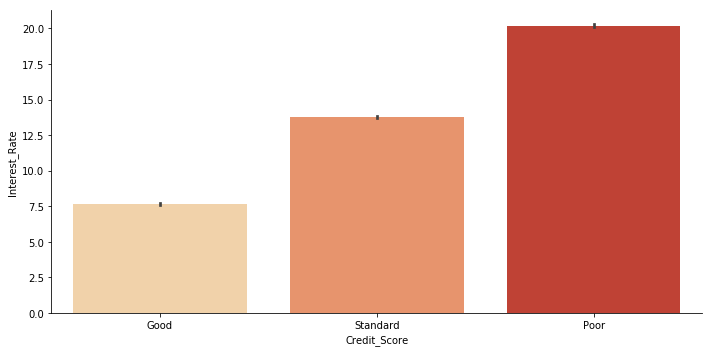

In [160]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.catplot(x='Credit_Score', data=df_graph,y='Interest_Rate', aspect=2, kind='bar',palette = "OrRd")

The graphic demonstrates the correlation between a customer's high interest rate and their likelihood of having a low credit score.

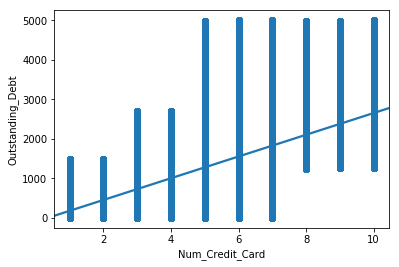

In [161]:
sns.regplot(x='Num_Credit_Card',y='Outstanding_Debt',data=df_graph)

We can deduce from the regression plot that as the number of credit cards rises, so does the amount of outstanding debt.


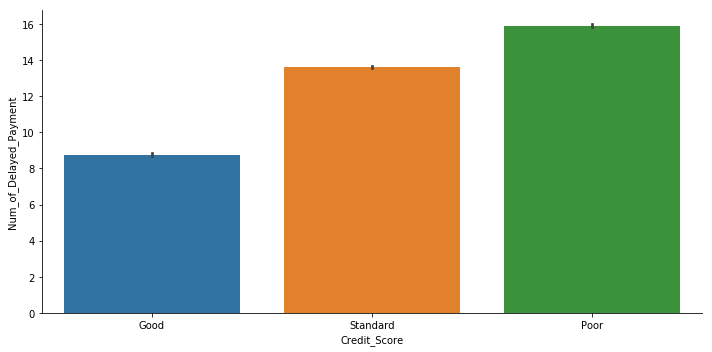

In [162]:
sns.catplot(y='Num_of_Delayed_Payment', data=df_graph, x='Credit_Score', aspect=2, kind='bar')

We can deduce from the data that a high number of late payments results in a low credit score. Therefore, settle your bills on time.


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

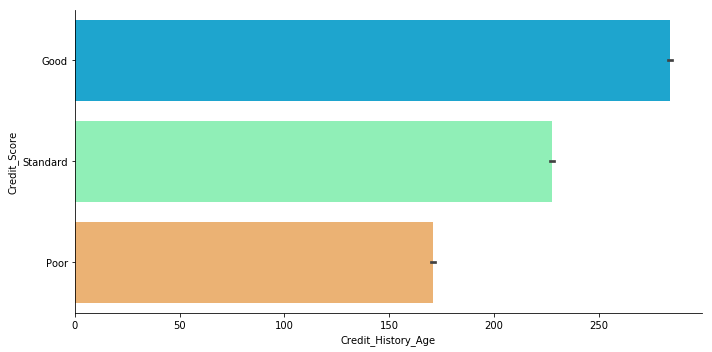

In [167]:
plt.figure(figsize=(12,4))
sns.catplot(y='Credit_Score', data=df_graph, x='Credit_History_Age', aspect=2, kind='bar', palette = 'rainbow')

.

The longer the credit history age the better the credit score!

In [168]:
df_graph['total_loans'] = df_clean['Auto Loan'] + df_clean['Credit-Builder Loan'] + df_clean['Not Specified'] +\
df_clean['Personal Loan'] + df_clean['Payday Loan'] + df_clean['Mortgage Loan'] + df_clean['Home Equity Loan']+\
df_clean['Debt Consolidation Loan']+ df_clean['Student Loan']

In [171]:
oci = df_graph.groupby(['Occupation','Credit_Score']).agg({'Credit_Score':'size', 'Annual_Income':'mean'}).\
rename(columns = {'Credit_Score':'Size'})

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

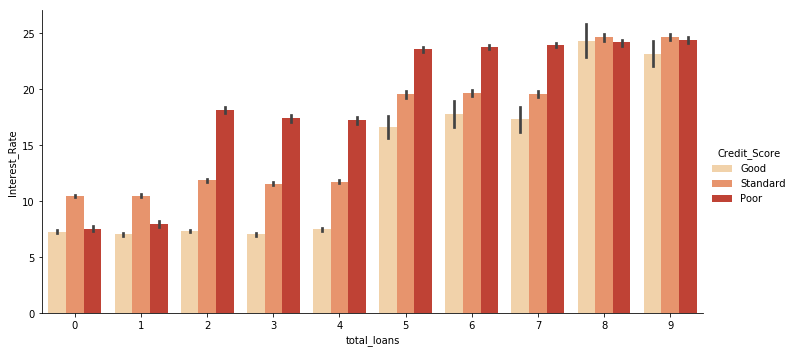

In [169]:
plt.figure(figsize=(12,4))
sns.catplot(x = 'total_loans',hue='Credit_Score', data=df_graph, y='Interest_Rate', aspect=2, kind='bar',palette = "OrRd")

We can deduce from the above graph that the likelihood of having a decent credit score increases as the interest rate and the total number of loans increase.

<h1>Observation: 1<h1>

In [175]:
oci = oci.reset_index()

In [176]:
oci

,Occupation,Credit_Score,Annual_Income
0,Accountant,Good,117132.974871
1,Accountant,Poor,189195.324266
2,Accountant,Standard,228440.396720
3,Architect,Good,194009.629627
4,Architect,Poor,146224.873272
5,Architect,Standard,165472.711147
6,Developer,Good,201040.389500
7,Developer,Poor,175191.111710
8,Developer,Standard,152617.870160
9,Doctor,Good,165268.558462


<h1>**Credit scores of managers with higher salaries are lower than those with lower salaries.**<h1>

In [177]:
oci[oci.Occupation == 'Manager'].sort_values(by = 'Annual_Income',ascending = False)[0:3]

,Occupation,Credit_Score,Annual_Income
25,Manager,Poor,218147.029313
26,Manager,Standard,149275.611381
24,Manager,Good,127509.735311


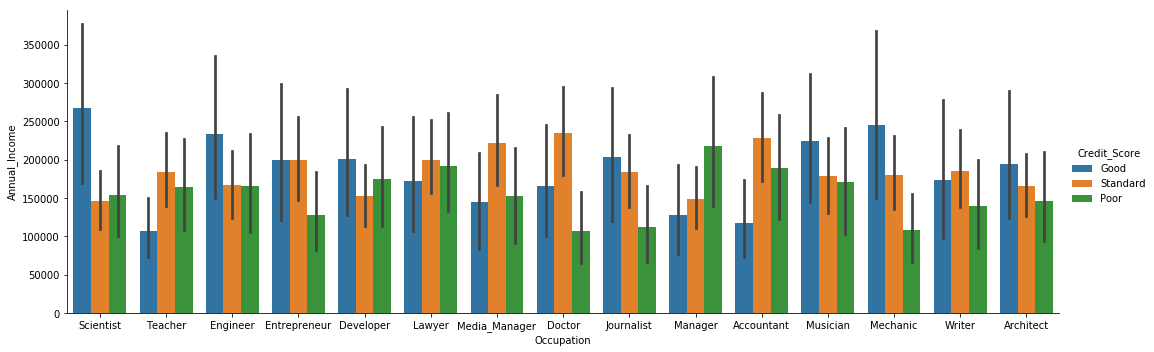

In [178]:
sns.catplot(y='Annual_Income', x='Occupation',hue='Credit_Score', data=df_graph, kind='bar',aspect=3)

<h1>Observation: 2<h1>

In [179]:
df_clean = df_clean.drop(columns = ['ID','Customer_ID','SSN_y'],axis = 1)

In [180]:
df_clean = df_clean.astype(float)

In [181]:
corr = df_clean.corr()
corr[corr<1].stack().nlargest(30)[::2]

Monthly_Inhand_Salary  Monthly_Balance           0.676318
Credit_History_Age     Credit_Mix                0.634015
Outstanding_Debt       Interest_Rate             0.629414
Num_Bank_Accounts      Num_of_Delayed_Payment    0.599977
Delay_from_due_date    Interest_Rate             0.589088
Interest_Rate          Num_Bank_Accounts         0.584628
                       Num_of_Delayed_Payment    0.572276
Delay_from_due_date    Outstanding_Debt          0.571713
                       Num_Bank_Accounts         0.560151
Payment_of_Min_Amount  Interest_Rate             0.546340
Delay_from_due_date    Num_of_Delayed_Payment    0.543357
Payment_of_Min_Amount  Num_of_Delayed_Payment    0.510610
Outstanding_Debt       Num_of_Delayed_Payment    0.507979
                       Num_Bank_Accounts         0.507285
Payment_of_Min_Amount  Num_Bank_Accounts         0.506083
dtype: float64

In [182]:
df_graph.Outstanding_Debt = df_graph.Outstanding_Debt.astype(float)

In [183]:
df_graph['discretized_debt_EW']=pd.cut(df_graph.Outstanding_Debt, bins=[0, 1500, 2735, 4990])

In [184]:
df_graph['IR_Range']=df_graph.apply(lambda x: 1 if x.Interest_Rate>24.5 else 0, axis = 1)

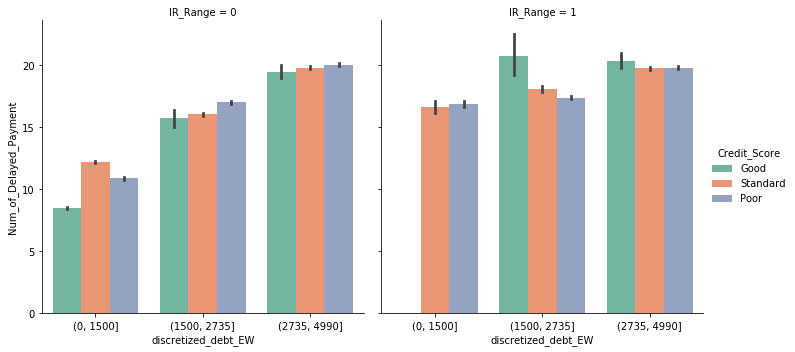

In [185]:
sns.factorplot(x='discretized_debt_EW',y='Num_of_Delayed_Payment', hue='Credit_Score', col = 'IR_Range', data=df_graph, kind='bar',palette='Set2')

<h1>**The higher the outstanding debt and the number of delayed payments, the better your credit score will be**<h1>

<h1>Observation: 3<h1>

In [186]:
df_clean['discretized_AI_EW']=pd.cut(df_graph.Amount_invested_monthly, bins=[0, 548,611,862,10000])

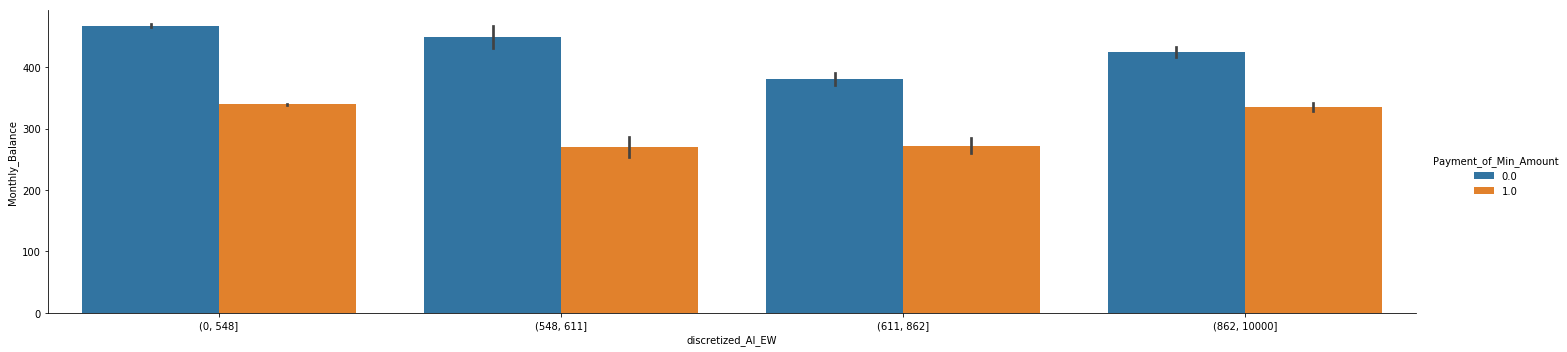

In [187]:
sns.catplot(y='Monthly_Balance', data=df_clean,x='discretized_AI_EW',hue='Payment_of_Min_Amount',aspect=4, kind='bar')

<h1>**A person with a higher monthly balance is more likely to invest more rather than pay the minimum credit amount**

<h1>Observation: 4

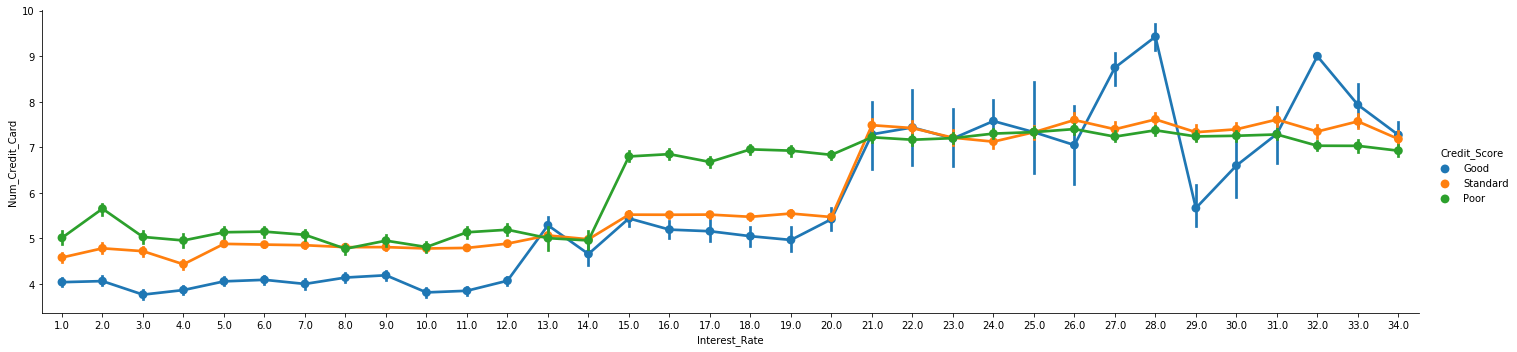

In [188]:
sns.catplot(x='Interest_Rate', data=df_graph,y='Num_Credit_Card',hue = 'Credit_Score',aspect=4, kind='point')

<h1>**Having a higher number of credit cards at the same or higher interest rate increases your chances of having a good credit score**<h1>

<div style="background-color: #FADBD8;">
**Observations**  
  
    

1) Credit scores of managers with higher salaries are lower than those with lower salaries.  
  
  

2) The higher the outstanding debt and the number of delayed payments, the better your credit score will be.  

3) A person with a higher monthly balance is more likely to invest more rather than pay the minimum credit amount.     

4) Having a higher number of credit cards at the same or higher interest rate increases your chances of having a good credit score


</div>

<div style="background-color: #FADBD8;">
**Conclusion**  
1) Make your payments on time to maintain a good credit score.  


2) Longer Credit History leads to better Credit Score. So start EARLY!  


3) Try to make credit card payments in full. In order to improve your credit score, you should pay more than the minimum due.
</div>